In [2]:
import numpy as np
import pandas as pd

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,id,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Pressure
0,0,500.0,8.4,0.0508,39.6,0.005662,216.0,4.676385,B,122.905
1,1,2000.0,15.4,0.0508,71.3,0.026427,149.0,34.469485,b,129.285
2,2,3150.0,19.7,0.0508,71.3,0.034118,230.0,21.730041,E,116.225
3,3,1000.0,11.2,0.0508,39.6,0.015048,156.0,6.997097,f,132.430
4,4,2500.0,12.6,0.1524,71.3,0.048316,247.0,11.218947,E,115.234


In [5]:
y = train["Pressure"]

In [6]:
x = train.drop(["Pressure"],axis = 1)

In [7]:
x.head()

,id,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8
0,0,500.0,8.4,0.0508,39.6,0.005662,216.0,4.676385,B
1,1,2000.0,15.4,0.0508,71.3,0.026427,149.0,34.469485,b
2,2,3150.0,19.7,0.0508,71.3,0.034118,230.0,21.730041,E
3,3,1000.0,11.2,0.0508,39.6,0.015048,156.0,6.997097,f
4,4,2500.0,12.6,0.1524,71.3,0.048316,247.0,11.218947,E


In [8]:
train.head()

,id,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Pressure
0,0,500.0,8.4,0.0508,39.6,0.005662,216.0,4.676385,B,122.905
1,1,2000.0,15.4,0.0508,71.3,0.026427,149.0,34.469485,b,129.285
2,2,3150.0,19.7,0.0508,71.3,0.034118,230.0,21.730041,E,116.225
3,3,1000.0,11.2,0.0508,39.6,0.015048,156.0,6.997097,f,132.430
4,4,2500.0,12.6,0.1524,71.3,0.048316,247.0,11.218947,E,115.234


In [9]:
x.describe()

,id,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7
count,1052.000000,1049.000000,1048.000000,1047.000000,1048.000000,1047.000000,1045.000000,1046.000000
mean,525.500000,2928.174452,6.914313,0.136025,50.964408,0.011229,150.796172,20.384337
std,303.830545,3132.041933,6.041421,0.094862,15.712071,0.013205,85.158763,11.675185
min,0.000000,200.000000,0.000000,0.025400,31.700000,0.000401,0.000000,0.025689
25%,262.750000,800.000000,2.000000,0.050800,39.600000,0.002514,77.000000,10.262863
50%,525.500000,2000.000000,5.300000,0.101600,39.600000,0.004957,152.000000,20.624518
75%,788.250000,4000.000000,11.200000,0.228600,71.300000,0.016104,223.000000,30.414567
max,1051.000000,20000.000000,22.200000,0.304800,71.300000,0.058411,299.000000,40.259143


In [10]:
x.describe(include=["O"])

,Attribute8
count,1047
unique,12
top,f
freq,109


In [11]:
x.columns = ['id','Frequency','Temperature','Length','Time','Length2','Force1','Force2','Type']

In [12]:
test.columns = ['id','Frequency','Temperature','Length','Time','Length2','Force1','Force2','Type']

In [13]:
data = (x,test)

In [14]:
for dataset in data:
    dataset['Frequency'] = dataset['Frequency'].fillna(2928)
    

In [15]:
for dataset in data:
    dataset['Frequency'] = ((dataset['Frequency']-min(dataset['Frequency']))/(max(dataset['Frequency']-min(dataset['Frequency']))))*20

In [16]:
x['Frequency'].mean()

2.755731267043061

In [17]:
for dataset in data:
    dataset['Temperature'] = dataset['Temperature'].fillna(dataset['Temperature'].mean())
    dataset['Temperature'] = ((dataset['Temperature']-min(dataset['Temperature']))/(max(dataset['Temperature']-min(dataset['Temperature']))))*20
    

In [18]:
for dataset in data:
    dataset['Frequency'] = dataset['Frequency']*3

In [19]:
for dataset in data:
    dataset['Length'] = dataset['Length'].fillna(dataset['Length'].mean())
    dataset['Length'] = ((dataset['Length']-min(dataset['Length']))/(max(dataset['Length']-min(dataset['Length']))))*20
    

In [20]:
x.describe()

,id,Frequency,Temperature,Length,Time,Length2,Force1,Force2
count,1052.000000,1052.000000,1052.000000,1052.000000,1048.000000,1047.000000,1045.000000,1046.000000
mean,525.500000,8.267194,6.229111,7.918729,50.964408,0.011229,150.796172,20.384337
std,303.830545,9.477481,5.432354,6.774247,15.712071,0.013205,85.158763,11.675185
min,0.000000,0.000000,0.000000,0.000000,31.700000,0.000401,0.000000,0.025689
25%,262.750000,1.818182,1.801802,1.818182,39.600000,0.002514,77.000000,10.262863
50%,525.500000,5.454545,4.774775,5.454545,39.600000,0.004957,152.000000,20.624518
75%,788.250000,11.515152,10.090090,14.545455,71.300000,0.016104,223.000000,30.414567
max,1051.000000,60.000000,20.000000,20.000000,71.300000,0.058411,299.000000,40.259143


In [21]:
for dataset in data:
    dataset['Time'] = dataset['Time'].fillna(dataset['Time'].mean())
    dataset['Time'] = ((dataset['Time']-min(dataset['Time']))/(max(dataset['Time']-min(dataset['Time']))))*20
    

In [22]:
x.describe()

,id,Frequency,Temperature,Length,Time,Length2,Force1,Force2
count,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1047.000000,1045.000000,1046.000000
mean,525.500000,8.267194,6.229111,7.918729,9.729499,0.011229,150.796172,20.384337
std,303.830545,9.477481,5.432354,6.774247,7.920274,0.013205,85.158763,11.675185
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000401,0.000000,0.025689
25%,262.750000,1.818182,1.801802,1.818182,3.989899,0.002514,77.000000,10.262863
50%,525.500000,5.454545,4.774775,5.454545,3.989899,0.004957,152.000000,20.624518
75%,788.250000,11.515152,10.090090,14.545455,20.000000,0.016104,223.000000,30.414567
max,1051.000000,60.000000,20.000000,20.000000,20.000000,0.058411,299.000000,40.259143


In [23]:
for dataset in data:
    dataset['Length2'] = dataset['Length2'].fillna(dataset['Length2'].mean())
    dataset['Length2'] = ((dataset['Length2']-min(dataset['Length2']))/(max(dataset['Length2']-min(dataset['Length2']))))*20
    

In [24]:
x.describe()

,id,Frequency,Temperature,Length,Time,Length2,Force1,Force2
count,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1045.000000,1046.000000
mean,525.500000,8.267194,6.229111,7.918729,9.729499,3.733198,150.796172,20.384337
std,303.830545,9.477481,5.432354,6.774247,7.920274,4.541618,85.158763,11.675185
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025689
25%,262.750000,1.818182,1.801802,1.818182,3.989899,0.728718,77.000000,10.262863
50%,525.500000,5.454545,4.774775,5.454545,3.989899,1.578004,152.000000,20.624518
75%,788.250000,11.515152,10.090090,14.545455,20.000000,5.413946,223.000000,30.414567
max,1051.000000,60.000000,20.000000,20.000000,20.000000,20.000000,299.000000,40.259143


In [25]:
for dataset in data:
    dataset['Force1'] = dataset['Force1'].fillna(dataset['Force1'].mean())
    dataset['Force1'] = ((dataset['Force1']-min(dataset['Force1']))/(max(dataset['Force1']-min(dataset['Force1']))))*20
    

In [26]:
x.describe()

,id,Frequency,Temperature,Length,Time,Length2,Force1,Force2
count,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1046.000000
mean,525.500000,8.267194,6.229111,7.918729,9.729499,3.733198,10.086700,20.384337
std,303.830545,9.477481,5.432354,6.774247,7.920274,4.541618,5.677237,11.675185
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025689
25%,262.750000,1.818182,1.801802,1.818182,3.989899,0.728718,5.150502,10.262863
50%,525.500000,5.454545,4.774775,5.454545,3.989899,1.578004,10.167224,20.624518
75%,788.250000,11.515152,10.090090,14.545455,20.000000,5.413946,14.916388,30.414567
max,1051.000000,60.000000,20.000000,20.000000,20.000000,20.000000,20.000000,40.259143


In [27]:
for dataset in data:
    dataset['Force2'] = dataset['Force2'].fillna(dataset['Force2'].mean())
    dataset['Force2'] = ((dataset['Force2']-min(dataset['Force2']))/(max(dataset['Force2']-min(dataset['Force2']))))*20
    

In [28]:
x.describe()

,id,Frequency,Temperature,Length,Time,Length2,Force1,Force2
count,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000
mean,525.500000,8.267194,6.229111,7.918729,9.729499,3.733198,10.086700,10.120259
std,303.830545,9.477481,5.432354,6.774247,7.920274,4.541618,5.677237,5.787130
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,262.750000,1.818182,1.801802,1.818182,3.989899,0.728718,5.150502,5.155069
50%,525.500000,5.454545,4.774775,5.454545,3.989899,1.578004,10.167224,10.188759
75%,788.250000,11.515152,10.090090,14.545455,20.000000,5.413946,14.916388,15.071483
max,1051.000000,60.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000


In [29]:
test.describe()

,id,Frequency,Temperature,Length,Time,Length2,Force1,Force2
count,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000
mean,225.000000,7.839448,5.870039,8.058859,9.552622,3.654010,10.081944,10.038387
std,130.336743,9.695200,5.069190,6.486087,7.716568,4.513411,5.776869,5.650028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,112.500000,1.303030,1.351351,1.818182,3.989899,0.757985,5.050167,5.500558
50%,225.000000,4.242424,4.864865,9.090909,3.989899,1.534067,10.234114,10.024055
75%,337.500000,11.515152,8.918919,14.545455,20.000000,4.713385,15.351171,14.792172
max,450.000000,60.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000


In [30]:
x.head()

,id,Frequency,Temperature,Length,Time,Length2,Force1,Force2,Type
0,0,0.909091,7.567568,1.818182,3.989899,1.814015,14.448161,2.311855,B
1,1,5.454545,13.873874,1.818182,20.000000,8.972915,9.966555,17.121968,b
2,2,8.939394,17.747748,1.818182,20.000000,11.624637,15.384615,10.789206,E
3,3,2.424242,10.090090,1.818182,3.989899,5.049806,10.434783,3.465478,f
4,4,6.969697,11.351351,9.090909,20.000000,16.519465,16.521739,5.564154,E


In [39]:
a

,Attribute8,Pressure
11,f,123.876092
10,e,124.352026
0,A,124.364798
8,c,124.388169
9,d,124.606107
3,D,124.691390
2,C,124.825663
7,b,124.870723
1,B,125.019742
5,F,125.045631


In [37]:
a = train[['Attribute8','Pressure']].groupby(['Attribute8'],as_index=False).mean().sort_values(by = 'Pressure')

In [40]:
for dataset in data:
    dataset['Type']=dataset['Type'].map({4:'a',4:'b',4:'c',4:'d',4:'e',4:'f',8:'A',8:'B',8:'C',8:'D',8:'E',8:'F'})

In [41]:
x.head()

,id,Frequency,Temperature,Length,Time,Length2,Force1,Force2,Type
0,0,0.909091,7.567568,1.818182,3.989899,1.814015,14.448161,2.311855,NaN
1,1,5.454545,13.873874,1.818182,20.000000,8.972915,9.966555,17.121968,NaN
2,2,8.939394,17.747748,1.818182,20.000000,11.624637,15.384615,10.789206,NaN
3,3,2.424242,10.090090,1.818182,3.989899,5.049806,10.434783,3.465478,NaN
4,4,6.969697,11.351351,9.090909,20.000000,16.519465,16.521739,5.564154,NaN


In [42]:
test.head()

,id,Frequency,Temperature,Length,Time,Length2,Force1,Force2,Type
0,0,29.696970,0.000000,0.000000,20.0,0.000000,19.464883,15.226730,NaN
1,1,18.484848,0.000000,20.000000,20.0,0.780094,0.133779,4.563590,NaN
2,2,6.969697,11.081081,5.454545,0.0,14.299078,13.712375,5.369284,NaN
3,3,0.606061,15.675676,0.000000,20.0,5.413946,17.792642,12.903884,NaN
4,4,6.969697,13.873874,1.818182,20.0,8.972915,19.063545,7.956210,NaN


In [63]:
x['Type']=train['Attribute8']

In [53]:
test.describe(include="O")

,Type
count,451
unique,12
top,A
freq,46


In [54]:
test.head()

,id,Frequency,Temperature,Length,Time,Length2,Force1,Force2,Type
0,0,29.696970,0.000000,0.000000,20.0,0.000000,19.464883,15.226730,a
1,1,18.484848,0.000000,20.000000,20.0,0.780094,0.133779,4.563590,C
2,2,6.969697,11.081081,5.454545,0.0,14.299078,13.712375,5.369284,E
3,3,0.606061,15.675676,0.000000,20.0,5.413946,17.792642,12.903884,F
4,4,6.969697,13.873874,1.818182,20.0,8.972915,19.063545,7.956210,F


In [50]:
temp = pd.read_csv('test.csv')

In [64]:
test['Type'] = temp['Attribute8']

In [67]:
x.describe(include="O")

,Type
count,1052
unique,12
top,f
freq,109


In [57]:
data = (x,test)

In [58]:
dataset = None

In [66]:
for dataset in data:
    dataset['Type'] = dataset['Type'].fillna('a')

In [68]:
for dataset in data:
    dataset['Type']=dataset['Type'].map({'a':4,'b':4,'c':4,'d':4,'e':4,'f':4,'A':8,'B':8,'C':8,'D':8,'E':8,'F':8,})

In [69]:
x.head()

,id,Frequency,Temperature,Length,Time,Length2,Force1,Force2,Type
0,0,0.909091,7.567568,1.818182,3.989899,1.814015,14.448161,2.311855,8
1,1,5.454545,13.873874,1.818182,20.000000,8.972915,9.966555,17.121968,4
2,2,8.939394,17.747748,1.818182,20.000000,11.624637,15.384615,10.789206,8
3,3,2.424242,10.090090,1.818182,3.989899,5.049806,10.434783,3.465478,4
4,4,6.969697,11.351351,9.090909,20.000000,16.519465,16.521739,5.564154,8


In [70]:
x.describe()

,id,Frequency,Temperature,Length,Time,Length2,Force1,Force2,Type
count,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000
mean,525.500000,8.267194,6.229111,7.918729,9.729499,3.733198,10.086700,10.120259,5.977186
std,303.830545,9.477481,5.432354,6.774247,7.920274,4.541618,5.677237,5.787130,2.000821
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,262.750000,1.818182,1.801802,1.818182,3.989899,0.728718,5.150502,5.155069,4.000000
50%,525.500000,5.454545,4.774775,5.454545,3.989899,1.578004,10.167224,10.188759,4.000000
75%,788.250000,11.515152,10.090090,14.545455,20.000000,5.413946,14.916388,15.071483,8.000000
max,1051.000000,60.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,8.000000


In [71]:
test.describe()

,id,Frequency,Temperature,Length,Time,Length2,Force1,Force2,Type
count,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000
mean,225.000000,7.839448,5.870039,8.058859,9.552622,3.654010,10.081944,10.038387,5.915743
std,130.336743,9.695200,5.069190,6.486087,7.716568,4.513411,5.776869,5.650028,2.000443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,112.500000,1.303030,1.351351,1.818182,3.989899,0.757985,5.050167,5.500558,4.000000
50%,225.000000,4.242424,4.864865,9.090909,3.989899,1.534067,10.234114,10.024055,4.000000
75%,337.500000,11.515152,8.918919,14.545455,20.000000,4.713385,15.351171,14.792172,8.000000
max,450.000000,60.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,8.000000


## Sk.learn_model


In [72]:
from sklearn.linear_model import LinearRegression

In [83]:
model_LG = LinearRegression()

In [84]:
x.shape

(1052, 8)

In [85]:
y.shape

(1052,)

In [156]:
model_LG.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [77]:
model_LG = None

In [79]:
x.head()

,id,Frequency,Temperature,Length,Time,Length2,Force1,Force2,Type
0,0,0.909091,7.567568,1.818182,3.989899,1.814015,14.448161,2.311855,8
1,1,5.454545,13.873874,1.818182,20.000000,8.972915,9.966555,17.121968,4
2,2,8.939394,17.747748,1.818182,20.000000,11.624637,15.384615,10.789206,8
3,3,2.424242,10.090090,1.818182,3.989899,5.049806,10.434783,3.465478,4
4,4,6.969697,11.351351,9.090909,20.000000,16.519465,16.521739,5.564154,8


In [80]:
x = x.drop(['id'],axis = 1)

In [81]:
x.head()

,Frequency,Temperature,Length,Time,Length2,Force1,Force2,Type
0,0.909091,7.567568,1.818182,3.989899,1.814015,14.448161,2.311855,8
1,5.454545,13.873874,1.818182,20.000000,8.972915,9.966555,17.121968,4
2,8.939394,17.747748,1.818182,20.000000,11.624637,15.384615,10.789206,8
3,2.424242,10.090090,1.818182,3.989899,5.049806,10.434783,3.465478,4
4,6.969697,11.351351,9.090909,20.000000,16.519465,16.521739,5.564154,8


In [82]:
test = test.drop(['id'],axis = 1)

In [87]:
score = round(model_LG.score(x,y)*100,2)

In [88]:
score

50.56

In [89]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,Flatten


Using TensorFlow backend.


In [154]:
model1.compile(optimizer = 'sgd',loss = 'mean_squared_error')

In [155]:
model1.fit(x_temp,y,epochs = 500,verbose = 2)

Epoch 1/500
 - 0s - loss: inf
Epoch 2/500
 - 0s - loss: nan
Epoch 3/500
 - 0s - loss: nan
Epoch 4/500
 - 0s - loss: nan
Epoch 5/500
 - 0s - loss: nan
Epoch 6/500
 - 0s - loss: nan
Epoch 7/500
 - 0s - loss: nan
Epoch 8/500
 - 0s - loss: nan
Epoch 9/500
 - 0s - loss: nan
Epoch 10/500
 - 0s - loss: nan
Epoch 11/500
 - 0s - loss: nan
Epoch 12/500
 - 0s - loss: nan
Epoch 13/500
 - 0s - loss: nan
Epoch 14/500
 - 0s - loss: nan
Epoch 15/500
 - 0s - loss: nan
Epoch 16/500
 - 0s - loss: nan
Epoch 17/500
 - 0s - loss: nan
Epoch 18/500
 - 0s - loss: nan
Epoch 19/500
 - 0s - loss: nan
Epoch 20/500
 - 0s - loss: nan
Epoch 21/500
 - 0s - loss: nan
Epoch 22/500
 - 0s - loss: nan
Epoch 23/500
 - 0s - loss: nan
Epoch 24/500
 - 0s - loss: nan
Epoch 25/500
 - 0s - loss: nan
Epoch 26/500
 - 0s - loss: nan
Epoch 27/500
 - 0s - loss: nan
Epoch 28/500
 - 0s - loss: nan
Epoch 29/500
 - 0s - loss: nan
Epoch 30/500
 - 0s - loss: nan
Epoch 31/500
 - 0s - loss: nan
Epoch 32/500
 - 0s - loss: nan
Epoch 33/500
 - 0

Epoch 261/500
 - 0s - loss: nan
Epoch 262/500
 - 0s - loss: nan
Epoch 263/500
 - 0s - loss: nan
Epoch 264/500
 - 0s - loss: nan
Epoch 265/500
 - 0s - loss: nan
Epoch 266/500
 - 0s - loss: nan
Epoch 267/500
 - 0s - loss: nan
Epoch 268/500
 - 0s - loss: nan
Epoch 269/500
 - 0s - loss: nan
Epoch 270/500
 - 0s - loss: nan
Epoch 271/500
 - 0s - loss: nan
Epoch 272/500
 - 0s - loss: nan
Epoch 273/500
 - 0s - loss: nan
Epoch 274/500
 - 0s - loss: nan
Epoch 275/500
 - 0s - loss: nan
Epoch 276/500
 - 0s - loss: nan
Epoch 277/500
 - 0s - loss: nan
Epoch 278/500
 - 0s - loss: nan
Epoch 279/500
 - 0s - loss: nan
Epoch 280/500
 - 0s - loss: nan
Epoch 281/500
 - 0s - loss: nan
Epoch 282/500
 - 0s - loss: nan
Epoch 283/500
 - 0s - loss: nan
Epoch 284/500
 - 0s - loss: nan
Epoch 285/500
 - 0s - loss: nan
Epoch 286/500
 - 0s - loss: nan
Epoch 287/500
 - 0s - loss: nan
Epoch 288/500
 - 0s - loss: nan
Epoch 289/500
 - 0s - loss: nan
Epoch 290/500
 - 0s - loss: nan
Epoch 291/500
 - 0s - loss: nan
Epoch 29

In [101]:
xnp = x.to_numpy()

In [103]:
type(xnp)

numpy.ndarray

In [113]:
xnp.shape

(1052, 8)

In [105]:
ynp = y.to_numpy()

In [106]:
ynp.shape

(1052,)

In [107]:
ynp

array([122.905, 129.285, 116.225, ..., 140.987, 130.777, 122.149])

In [108]:
xnp

array([[ 0.90909091,  7.56756757,  1.81818182, ..., 14.44816054,
         2.31185484,  8.        ],
       [ 5.45454545, 13.87387387,  1.81818182, ...,  9.96655518,
        17.12196798,  4.        ],
       [ 8.93939394, 17.74774775,  1.81818182, ..., 15.38461538,
        10.78920625,  8.        ],
       ...,
       [ 3.18181818, 20.        ,  0.        , ...,  1.20401338,
        16.51367045,  8.        ],
       [ 3.18181818,  4.86486486,  9.09090909, ..., 19.13043478,
         7.98172022,  4.        ],
       [ 2.42424242,  8.91891892,  9.09090909, ..., 16.65551839,
        13.63471921,  8.        ]])

In [152]:
model1 = Sequential([
    Dense(units = 1, input_shape= [7])
])

In [153]:
model1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 1)                 8         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


In [126]:
model1 = None

In [148]:
model1.predict(c)

array([[1.007116 ],
       [2.0044355],
       [3.001755 ],
       [3.9990745],
       [4.996394 ],
       [5.993714 ]], dtype=float32)

In [132]:
model_LG.predict(xnp[0:2])

array([130.39695229, 125.15737279])

In [133]:
ynp[0:2]

array([122.905, 129.285])

In [144]:
c = np.array([[1,1,1,1,1],[2,2,2,2,2],[3,3,3,3,3],[4,4,4,4,4],[5,5,5,5,5],[6,6,6,6,6]])

In [145]:
d = np.array([1,2,3,4,5,6])

In [146]:
c.shape

(6, 5)

In [147]:
d.shape

(6,)

In [150]:
x_temp = x.drop(['Type'],axis = 1)

In [151]:
x_temp.shape

(1052, 7)

In [157]:
test.shape

(451, 8)

In [158]:
pred1 = model_LG.predict(test)

In [160]:
pred1.shape

(451,)

In [181]:
series = np.arange(40)

In [182]:
from matplotlib import pyplot as plt

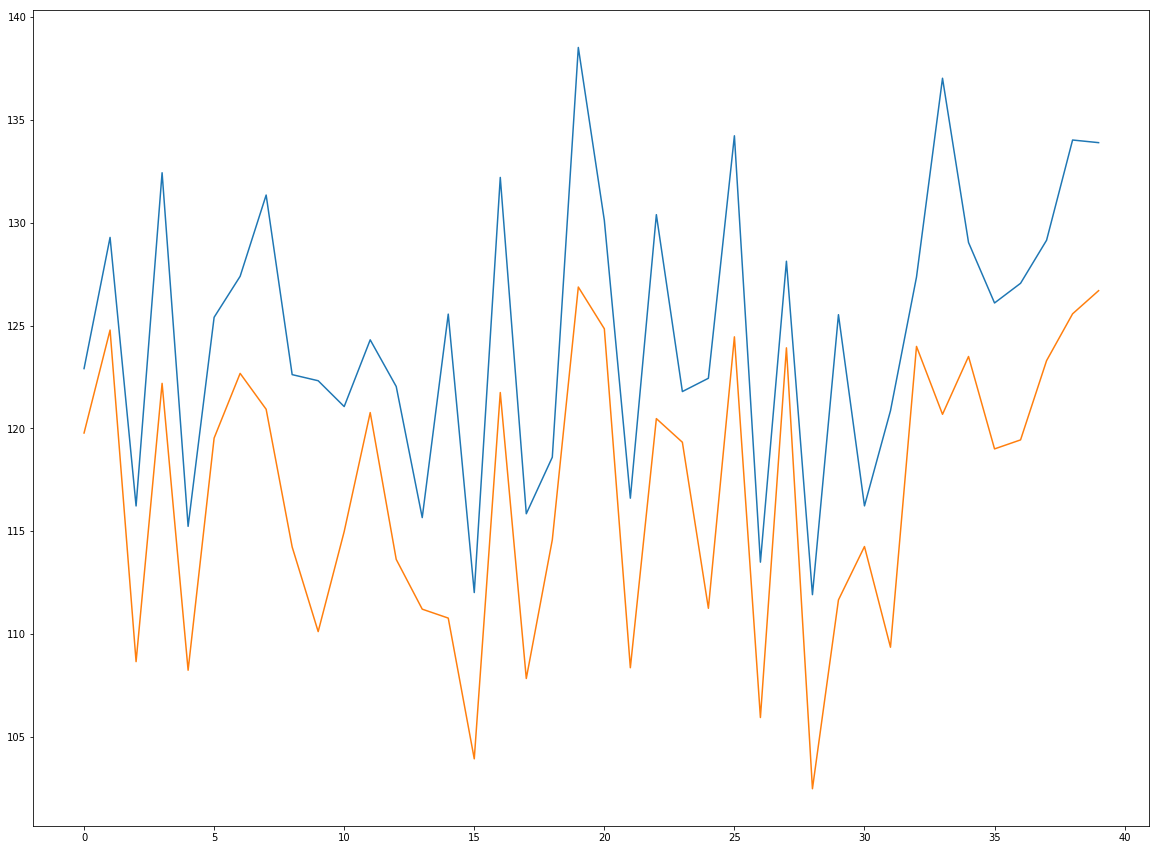

In [320]:
plt.figure(figsize=(20,15))
plt.plot(series,y[:40])
plt.plot(series,s[:40])



In [170]:
def mse(a,b):
    return np.sum((np.square(a-b))/len(a))
def mae(a,b):
    return np.sum((np.abs(a-b))/len(a))
def rmse(a,b):
    return np.sqrt(np.sum((np.square(a-b))/len(a)))
def mape(a,b):
    return np.sum((np.abs((a-b)/a))/len(a))

In [166]:
check = model_LG.predict(x)

In [167]:
check[0:5]

array([130.39695229, 125.15737279, 121.20238553, 126.98977002,
       119.06669172])

In [168]:
y[0:5]

0    122.905
1    129.285
2    116.225
3    132.430
4    115.234
Name: Pressure, dtype: float64

In [173]:
mape(y,check)

0.030278535095172067

In [174]:
y.shape

(1052,)

In [184]:
train.head()

,id,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Pressure
0,0,500.0,8.4,0.0508,39.6,0.005662,216.0,4.676385,B,122.905
1,1,2000.0,15.4,0.0508,71.3,0.026427,149.0,34.469485,b,129.285
2,2,3150.0,19.7,0.0508,71.3,0.034118,230.0,21.730041,E,116.225
3,3,1000.0,11.2,0.0508,39.6,0.015048,156.0,6.997097,f,132.430
4,4,2500.0,12.6,0.1524,71.3,0.048316,247.0,11.218947,E,115.234


In [185]:
x1 = train.drop(['Pressure'],axis = 1)

In [186]:
temp.head()

,id,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8
0,0,10000,0.0,0.0254,71.3,0.000401,291,30.666998,a
1,1,6300,0.0,0.3048,71.3,0.002663,2,9.215988,C
2,2,2500,12.3,0.1016,31.7,0.041876,205,10.836800,E
3,3,400,17.4,0.0254,71.3,0.016104,266,25.994134,F
4,4,2500,15.4,0.0508,71.3,0.026427,285,16.040911,F


In [187]:
x1 = x1.drop(['id','Attribute8'],axis =1)

In [189]:
temp = temp.drop(['id','Attribute8'],axis =1)

In [190]:
x1.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7
0,500.0,8.4,0.0508,39.6,0.005662,216.0,4.676385
1,2000.0,15.4,0.0508,71.3,0.026427,149.0,34.469485
2,3150.0,19.7,0.0508,71.3,0.034118,230.0,21.730041
3,1000.0,11.2,0.0508,39.6,0.015048,156.0,6.997097
4,2500.0,12.6,0.1524,71.3,0.048316,247.0,11.218947


In [191]:
temp.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7
0,10000,0.0,0.0254,71.3,0.000401,291,30.666998
1,6300,0.0,0.3048,71.3,0.002663,2,9.215988
2,2500,12.3,0.1016,31.7,0.041876,205,10.836800
3,400,17.4,0.0254,71.3,0.016104,266,25.994134
4,2500,15.4,0.0508,71.3,0.026427,285,16.040911


In [192]:
f = (x1,temp)

In [195]:
for dataset in f:
    dataset['Attribute1'] = dataset['Attribute1'].fillna(dataset['Attribute1'].mean())
    dataset['Attribute2'] = dataset['Attribute2'].fillna(dataset['Attribute2'].mean())
    dataset['Attribute3'] = dataset['Attribute3'].fillna(dataset['Attribute3'].mean())
    dataset['Attribute4'] = dataset['Attribute4'].fillna(dataset['Attribute4'].mean())
    dataset['Attribute5'] = dataset['Attribute5'].fillna(dataset['Attribute5'].mean())
    dataset['Attribute6'] = dataset['Attribute7'].fillna(dataset['Attribute6'].mean())
    dataset['Attribute7'] = dataset['Attribute7'].fillna(dataset['Attribute7'].mean())

In [196]:
x1.describe()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7
count,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000
mean,2928.174452,6.914313,0.136025,50.964408,0.011229,21.128131,20.384337
std,3127.568650,6.029913,0.094636,15.682143,0.013173,15.233838,11.641812
min,200.000000,0.000000,0.025400,31.700000,0.000401,0.025689,0.025689
25%,800.000000,2.000000,0.050800,39.600000,0.002514,10.396000,10.396000
50%,2000.000000,5.300000,0.101600,39.600000,0.004978,20.695887,20.522137
75%,4000.000000,11.200000,0.228600,71.300000,0.016104,30.703241,30.344581
max,20000.000000,22.200000,0.304800,71.300000,0.058411,150.796172,40.259143


In [197]:
model2_LG = LinearRegression()

In [198]:
model2_LG.fit(x1,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [199]:
pred2 = model2_LG.predict(temp)

In [202]:
check2 = model2_LG.predict(x1)

In [205]:
check2.shape

(1052,)

In [206]:
y.shape

(1052,)

In [208]:
mse(y,check2)

23.58645731145566

In [210]:
mse(y,check)

23.62294932554301

In [213]:
from sklearn.tree import DecisionTreeClassifier

In [214]:
model3 = DecisionTreeClassifier()

In [219]:
model3.fit(xnp,ynp)

ValueError: Unknown label type: 'continuous'

In [218]:
ynp

array([122.905, 129.285, 116.225, ..., 140.987, 130.777, 122.149])

In [225]:
pred2

array([126.32181029, 120.5871675 , 117.91611936, 129.02762901,
       124.81265652, 129.06057544, 120.25188775, 133.33297816,
       119.44166278, 126.04445193, 124.92583543, 127.04154788,
       132.60702959, 121.27471695, 123.73713188, 119.04305909,
       128.86506842, 123.11506887, 118.04844013, 124.89865375,
       122.15663029, 127.42107006, 127.57939684, 125.88941879,
       128.71825131, 122.72026788, 116.62850093, 126.71459099,
       127.8331791 , 126.2129796 , 129.85203538, 124.01905864,
       109.55510567, 127.75230664, 127.98624235, 129.59549928,
       120.00029907, 104.13057351, 126.98355005, 129.79393135,
       132.01758743, 122.61860229, 124.80883737, 118.7727964 ,
       116.39683108, 131.23001926, 126.52375848, 129.86013637,
       131.71059783, 123.07817942, 120.20991451, 124.1358334 ,
       118.89640097, 124.83419021, 122.14506615, 123.73804741,
       113.98682852, 125.74204114, 124.23432062, 120.42662971,
       125.14031417, 125.25342008, 127.74038023, 130.62

In [223]:
trial = pd.read_csv('test.csv')

In [224]:
trial.head()

,id,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8
0,0,10000,0.0,0.0254,71.3,0.000401,291,30.666998,a
1,1,6300,0.0,0.3048,71.3,0.002663,2,9.215988,C
2,2,2500,12.3,0.1016,31.7,0.041876,205,10.836800,E
3,3,400,17.4,0.0254,71.3,0.016104,266,25.994134,F
4,4,2500,15.4,0.0508,71.3,0.026427,285,16.040911,F


In [226]:
a = pd.DataFrame({'id':trial['id'],'Pressure':pred2})

In [227]:
a.head()

,id,Pressure
0,0,126.321810
1,1,120.587167
2,2,117.916119
3,3,129.027629
4,4,124.812657


In [228]:
a.to_csv('Submissions.csv')

In [230]:
type(xnp)

numpy.ndarray

In [231]:
type(ynp)

numpy.ndarray

In [232]:
xnp.shape

(1052, 8)

In [233]:
tri = xnp[0:10]

In [236]:
tri.shape

(10, 8)

In [237]:
triy = ynp[0:10]

In [239]:
triy

array([122.905, 129.285, 116.225, 132.43 , 115.234, 125.401, 127.394,
       131.346, 122.612, 122.315])

In [258]:
model_check = Sequential([
    Dense(500, input_dim=8, activation= "relu"),
    Dense(100, activation= "relu"),
    Dense(50, activation= "relu"),
    Dense(1)
])

In [259]:
model_check.compile(loss = "mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

In [260]:
model_check.fit(x,y,epochs = 500,verbose = 2)

Epoch 1/500
 - 0s - loss: 7901.2142 - mean_squared_error: 7901.2153
Epoch 2/500
 - 0s - loss: 1203.0907 - mean_squared_error: 1203.0907
Epoch 3/500
 - 0s - loss: 724.5497 - mean_squared_error: 724.5498
Epoch 4/500
 - 0s - loss: 571.8882 - mean_squared_error: 571.8882
Epoch 5/500
 - 0s - loss: 469.5277 - mean_squared_error: 469.5278
Epoch 6/500
 - 0s - loss: 419.2784 - mean_squared_error: 419.2784
Epoch 7/500
 - 0s - loss: 393.2483 - mean_squared_error: 393.2483
Epoch 8/500
 - 0s - loss: 367.7265 - mean_squared_error: 367.7264
Epoch 9/500
 - 0s - loss: 352.9880 - mean_squared_error: 352.9880
Epoch 10/500
 - 0s - loss: 333.4719 - mean_squared_error: 333.4719
Epoch 11/500
 - 0s - loss: 316.4892 - mean_squared_error: 316.4892
Epoch 12/500
 - 0s - loss: 305.9598 - mean_squared_error: 305.9598
Epoch 13/500
 - 0s - loss: 296.5509 - mean_squared_error: 296.5509
Epoch 14/500
 - 0s - loss: 278.5533 - mean_squared_error: 278.5532
Epoch 15/500
 - 0s - loss: 260.5221 - mean_squared_error: 260.5221


Epoch 127/500
 - 0s - loss: 8.9657 - mean_squared_error: 8.9657
Epoch 128/500
 - 0s - loss: 8.2808 - mean_squared_error: 8.2808
Epoch 129/500
 - 0s - loss: 6.0621 - mean_squared_error: 6.0621
Epoch 130/500
 - 0s - loss: 7.6611 - mean_squared_error: 7.6611
Epoch 131/500
 - 0s - loss: 10.4311 - mean_squared_error: 10.4311
Epoch 132/500
 - 0s - loss: 6.4162 - mean_squared_error: 6.4162
Epoch 133/500
 - 0s - loss: 6.1867 - mean_squared_error: 6.1867
Epoch 134/500
 - 0s - loss: 7.4988 - mean_squared_error: 7.4988
Epoch 135/500
 - 0s - loss: 5.9252 - mean_squared_error: 5.9252
Epoch 136/500
 - 0s - loss: 4.8072 - mean_squared_error: 4.8072
Epoch 137/500
 - 0s - loss: 5.3881 - mean_squared_error: 5.3881
Epoch 138/500
 - 0s - loss: 6.1306 - mean_squared_error: 6.1306
Epoch 139/500
 - 0s - loss: 5.7024 - mean_squared_error: 5.7024
Epoch 140/500
 - 0s - loss: 18.2130 - mean_squared_error: 18.2130
Epoch 141/500
 - 0s - loss: 10.3023 - mean_squared_error: 10.3023
Epoch 142/500
 - 0s - loss: 6.7975

Epoch 255/500
 - 0s - loss: 3.7138 - mean_squared_error: 3.7138
Epoch 256/500
 - 0s - loss: 3.6284 - mean_squared_error: 3.6284
Epoch 257/500
 - 0s - loss: 2.9876 - mean_squared_error: 2.9876
Epoch 258/500
 - 0s - loss: 2.8051 - mean_squared_error: 2.8051
Epoch 259/500
 - 0s - loss: 3.5926 - mean_squared_error: 3.5926
Epoch 260/500
 - 0s - loss: 4.0133 - mean_squared_error: 4.0133
Epoch 261/500
 - 0s - loss: 4.1630 - mean_squared_error: 4.1630
Epoch 262/500
 - 0s - loss: 3.2306 - mean_squared_error: 3.2306
Epoch 263/500
 - 0s - loss: 4.8000 - mean_squared_error: 4.8000
Epoch 264/500
 - 0s - loss: 3.1523 - mean_squared_error: 3.1523
Epoch 265/500
 - 0s - loss: 3.5710 - mean_squared_error: 3.5710
Epoch 266/500
 - 0s - loss: 3.6744 - mean_squared_error: 3.6744
Epoch 267/500
 - 0s - loss: 3.5360 - mean_squared_error: 3.5360
Epoch 268/500
 - 0s - loss: 3.0176 - mean_squared_error: 3.0176
Epoch 269/500
 - 0s - loss: 2.6364 - mean_squared_error: 2.6364
Epoch 270/500
 - 0s - loss: 3.4461 - mea

 - 0s - loss: 2.4428 - mean_squared_error: 2.4428
Epoch 384/500
 - 0s - loss: 2.7924 - mean_squared_error: 2.7924
Epoch 385/500
 - 0s - loss: 1.7681 - mean_squared_error: 1.7681
Epoch 386/500
 - 0s - loss: 2.6960 - mean_squared_error: 2.6960
Epoch 387/500
 - 0s - loss: 1.8085 - mean_squared_error: 1.8085
Epoch 388/500
 - 0s - loss: 1.7808 - mean_squared_error: 1.7808
Epoch 389/500
 - 0s - loss: 1.6638 - mean_squared_error: 1.6638
Epoch 390/500
 - 0s - loss: 3.1267 - mean_squared_error: 3.1267
Epoch 391/500
 - 0s - loss: 2.7636 - mean_squared_error: 2.7636
Epoch 392/500
 - 0s - loss: 1.7765 - mean_squared_error: 1.7765
Epoch 393/500
 - 0s - loss: 2.0636 - mean_squared_error: 2.0636
Epoch 394/500
 - 0s - loss: 2.6277 - mean_squared_error: 2.6277
Epoch 395/500
 - 0s - loss: 4.9126 - mean_squared_error: 4.9126
Epoch 396/500
 - 0s - loss: 2.5717 - mean_squared_error: 2.5717
Epoch 397/500
 - 0s - loss: 3.3907 - mean_squared_error: 3.3907
Epoch 398/500
 - 0s - loss: 4.5365 - mean_squared_erro

In [272]:
remain = model_check.predict(x)

In [273]:
remain

array([[123.82408 ],
       [127.107635],
       [117.59709 ],
       ...,
       [137.96016 ],
       [129.31157 ],
       [121.79178 ]], dtype=float32)

In [265]:
y.shape

(1052,)

In [267]:
remain.shape

(1052, 1)

In [269]:
type(test)

pandas.core.frame.DataFrame

In [270]:
tester = test.to_numpy()

In [275]:
type(x)

pandas.core.frame.DataFrame

In [276]:
type(test)

pandas.core.frame.DataFrame

In [279]:
pred3 = model_check.predict(test)

In [280]:
pred3.shape

(451, 1)

In [281]:
pred3 = pred3.reshape([451,])

In [283]:
pred3.shape

(451,)

In [284]:
remain = remain.reshape([1052,])

In [285]:
remain.shape

(1052,)

In [286]:
mse(y,remain)

1.3358665227950883

In [288]:
pred3

array([132.941   , 122.31839 , 111.85562 , 120.78882 , 126.03731 ,
       120.9791  , 121.02379 , 136.0586  , 110.872604, 126.471405,
       123.92661 , 128.82109 , 133.78377 , 118.898346, 124.57019 ,
       113.21938 , 128.77394 , 130.256   , 121.34381 , 119.13931 ,
       118.42018 , 130.94182 , 125.75728 , 124.66545 , 131.82153 ,
       119.15896 , 115.35045 , 134.876   , 128.93092 , 125.18379 ,
       128.20316 , 115.57154 , 102.063446, 128.9577  , 130.39244 ,
       134.91919 , 113.56552 , 115.14395 , 127.22573 , 128.3069  ,
       131.38332 , 123.3761  , 130.54134 , 121.60768 , 110.1187  ,
       132.77388 , 127.568375, 126.71918 , 126.71225 , 125.677155,
       121.35851 , 127.16608 , 113.41297 , 126.17287 , 116.09425 ,
       119.60373 , 113.44808 , 128.7126  , 119.90436 , 120.50432 ,
       126.3098  , 129.46365 , 129.69113 , 135.10738 , 125.16713 ,
       126.411   , 129.25462 , 131.85988 , 128.40312 , 117.41595 ,
       121.67253 , 124.92183 , 125.208   , 128.88603 , 124.671

In [289]:
b = pd.DataFrame({'id':trial['id'],'Pressure':pred3})

In [290]:
b.to_csv('Submission2.csv')

In [291]:
model_check.predict(x[0:5])

array([[123.82407],
       [127.10764],
       [117.59709],
       [131.44283],
       [114.78741]], dtype=float32)

In [292]:
y[0:5]

0    122.905
1    129.285
2    116.225
3    132.430
4    115.234
Name: Pressure, dtype: float64

In [293]:
from sklearn.ensemble import RandomForestRegressor

In [294]:
rfr =  RandomForestRegressor()

In [295]:
rfr.fit(x,y)

C:\Users\SHALIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [296]:
rfr.score(x,y)

0.965205750729741

In [297]:
pred_4 = rfr.predict(test)

In [298]:
rrr = rfr.predict(x)

In [362]:
mse(y,rrr)

1.6625609827281362

In [363]:
c = pd.DataFrame({'id':trial['id'],'Pressure':pred_4})

In [364]:
c.to_csv('Submission3.csv')

In [306]:
x

,Frequency,Temperature,Length,Time,Length2,Force1,Force2,Type
0,0.909091,7.567568,1.818182,3.989899,1.814015,14.448161,2.311855,8
1,5.454545,13.873874,1.818182,20.000000,8.972915,9.966555,17.121968,4
2,8.939394,17.747748,1.818182,20.000000,11.624637,15.384615,10.789206,8
3,2.424242,10.090090,1.818182,3.989899,5.049806,10.434783,3.465478,4
4,6.969697,11.351351,9.090909,20.000000,16.519465,16.521739,5.564154,8
5,1.303030,0.000000,5.454545,3.989899,0.366360,16.454849,0.690257,8
6,1.818182,2.432432,9.090909,20.000000,0.702571,12.173913,18.547109,8
7,23.636364,4.324324,0.000000,3.989899,0.174724,6.622074,18.496910,4
8,11.515152,7.567568,1.818182,12.020202,1.740322,8.160535,11.510805,4
9,1.818182,11.081081,5.454545,3.989899,13.937489,4.280936,4.040269,4


In [308]:
from sklearn.externals import joblib 
  

joblib.dump(rfr, 'RandomForestRegressor.pkl')
joblib.dump(model_check, 'Keras1.pkl')
joblib.dump(model_LG, 'LinearRegressor.pkl')


['LinearRegressor.pkl']

In [348]:
model_go = Sequential([
    Dense(500, input_dim=8, activation= "relu"),
    Dense(200, activation= "relu"),
    Dense(75, activation= "relu"),
    Dense(25, activation= "relu"),
    Dense(1)
])

In [349]:
#model_go.compile(loss='mean_squarred_error',optimizer =  '')
from keras.optimizers import RMSprop

In [350]:
model_go.compile(loss='mean_squared_error',optimizer = "adam")

In [351]:
model_go.fit(x,y,epochs = 500,verbose = 2)

Epoch 1/500
 - 0s - loss: 4843.5496
Epoch 2/500
 - 0s - loss: 739.4887
Epoch 3/500
 - 0s - loss: 515.7834
Epoch 4/500
 - 0s - loss: 436.3040
Epoch 5/500
 - 0s - loss: 402.0449
Epoch 6/500
 - 0s - loss: 387.9851
Epoch 7/500
 - 0s - loss: 362.5273
Epoch 8/500
 - 0s - loss: 337.6764
Epoch 9/500
 - 0s - loss: 313.6300
Epoch 10/500
 - 0s - loss: 299.1596
Epoch 11/500
 - 0s - loss: 276.6806
Epoch 12/500
 - 0s - loss: 268.2998
Epoch 13/500
 - 0s - loss: 245.4186
Epoch 14/500
 - 0s - loss: 227.4125
Epoch 15/500
 - 0s - loss: 207.9188
Epoch 16/500
 - 0s - loss: 206.6891
Epoch 17/500
 - 0s - loss: 170.9054
Epoch 18/500
 - 0s - loss: 157.1741
Epoch 19/500
 - 0s - loss: 127.5351
Epoch 20/500
 - 0s - loss: 121.8032
Epoch 21/500
 - 0s - loss: 112.6121
Epoch 22/500
 - 0s - loss: 90.1263
Epoch 23/500
 - 0s - loss: 78.5856
Epoch 24/500
 - 0s - loss: 70.8292
Epoch 25/500
 - 0s - loss: 55.5048
Epoch 26/500
 - 0s - loss: 46.6408
Epoch 27/500
 - 0s - loss: 46.9589
Epoch 28/500
 - 0s - loss: 40.8151
Epoch 2

Epoch 236/500
 - 0s - loss: 4.5068
Epoch 237/500
 - 0s - loss: 2.9769
Epoch 238/500
 - 0s - loss: 2.2614
Epoch 239/500
 - 0s - loss: 6.5244
Epoch 240/500
 - 0s - loss: 5.0572
Epoch 241/500
 - 0s - loss: 2.7493
Epoch 242/500
 - 0s - loss: 2.0946
Epoch 243/500
 - 0s - loss: 2.5378
Epoch 244/500
 - 0s - loss: 2.9737
Epoch 245/500
 - 0s - loss: 2.7109
Epoch 246/500
 - 0s - loss: 2.4898
Epoch 247/500
 - 0s - loss: 1.8998
Epoch 248/500
 - 0s - loss: 2.4551
Epoch 249/500
 - 0s - loss: 2.3581
Epoch 250/500
 - 0s - loss: 5.8039
Epoch 251/500
 - 0s - loss: 7.8240
Epoch 252/500
 - 0s - loss: 14.5499
Epoch 253/500
 - 0s - loss: 11.3898
Epoch 254/500
 - 0s - loss: 7.6251
Epoch 255/500
 - 0s - loss: 3.3237
Epoch 256/500
 - 0s - loss: 2.0558
Epoch 257/500
 - 0s - loss: 3.1705
Epoch 258/500
 - 0s - loss: 1.7176
Epoch 259/500
 - 0s - loss: 1.8217
Epoch 260/500
 - 0s - loss: 4.9044
Epoch 261/500
 - 0s - loss: 7.9582
Epoch 262/500
 - 0s - loss: 4.8836
Epoch 263/500
 - 0s - loss: 4.4286
Epoch 264/500
 - 0

 - 0s - loss: 1.6522
Epoch 471/500
 - 0s - loss: 1.5700
Epoch 472/500
 - 0s - loss: 1.4485
Epoch 473/500
 - 0s - loss: 1.7240
Epoch 474/500
 - 0s - loss: 1.7983
Epoch 475/500
 - 0s - loss: 4.0523
Epoch 476/500
 - 0s - loss: 3.6055
Epoch 477/500
 - 0s - loss: 2.4956
Epoch 478/500
 - 0s - loss: 2.1357
Epoch 479/500
 - 0s - loss: 2.3199
Epoch 480/500
 - 0s - loss: 3.6114
Epoch 481/500
 - 0s - loss: 2.8199
Epoch 482/500
 - 0s - loss: 3.1280
Epoch 483/500
 - 0s - loss: 2.8083
Epoch 484/500
 - 0s - loss: 2.4904
Epoch 485/500
 - 0s - loss: 2.9465
Epoch 486/500
 - 0s - loss: 2.6263
Epoch 487/500
 - 0s - loss: 2.5228
Epoch 488/500
 - 0s - loss: 3.0782
Epoch 489/500
 - 0s - loss: 2.7886
Epoch 490/500
 - 0s - loss: 2.6870
Epoch 491/500
 - 0s - loss: 2.2148
Epoch 492/500
 - 0s - loss: 2.5820
Epoch 493/500
 - 0s - loss: 2.9541
Epoch 494/500
 - 0s - loss: 2.6799
Epoch 495/500
 - 0s - loss: 6.3243
Epoch 496/500
 - 0s - loss: 3.9555
Epoch 497/500
 - 0s - loss: 2.0964
Epoch 498/500
 - 0s - loss: 2.1635

In [352]:
s = model_go.predict(x)

In [353]:
s = s.reshape([1052,])

In [354]:
mse(y,s)

1.153239495851528

In [355]:
pred6 = model_go.predict(test)

In [359]:
c = pd.DataFrame({'id':trial['id'],'Pressure':pred6})
c.to_csv('Submission9.csv',index = False)

In [357]:
pred6 = pred6.reshape([451,])

In [365]:
from sklearn.ensemble import ExtraTreesRegressor

In [366]:
etr = ExtraTreesRegressor()

In [367]:
etr.fit(x,y)

C:\Users\SHALIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [368]:
q = etr.predict(x)

In [369]:
mse(y,q)

3.4361941179512976e-28

In [370]:
f = etr.predict(test)

In [371]:
c = pd.DataFrame({'id':trial['id'],'Pressure':f})

In [372]:
c.to_csv('Submission13.csv')

In [375]:
etr.score(x,y)

1.0

In [376]:
f

array([131.7542, 117.5375, 111.7512, 119.427 , 123.155 , 122.2354,
       119.0967, 129.1754, 116.2279, 124.5994, 126.6574, 132.0198,
       128.1076, 116.9694, 126.2669, 114.3778, 128.4997, 134.4989,
       121.1559, 117.3692, 119.0322, 129.1884, 129.8345, 128.4558,
       130.9103, 121.7257, 117.6933, 138.1497, 130.455 , 129.2224,
       127.0458, 122.1344, 105.158 , 126.3405, 132.8273, 129.9344,
       117.6341, 113.2066, 127.1088, 125.1884, 130.2689, 124.2785,
       128.9076, 123.4184, 113.1959, 133.3063, 126.3242, 129.5306,
       127.504 , 127.749 , 125.1644, 126.5048, 120.5368, 128.5561,
       121.4872, 122.0699, 116.7522, 130.7477, 120.4788, 123.334 ,
       123.5993, 131.611 , 127.5014, 132.8652, 126.3809, 123.9408,
       126.1147, 130.6327, 129.5356, 114.1855, 128.571 , 126.7747,
       123.3885, 129.25  , 124.0337, 123.5729, 125.4345, 126.6646,
       130.8793, 128.6252, 131.6979, 129.0102, 119.3169, 123.6151,
       127.1673, 118.6684, 128.0217, 124.4891, 131.9326, 128.0

In [378]:
from sklearn.ensemble import GradientBoostingRegressor

In [379]:
gbc = GradientBoostingRegressor()

In [380]:
gbc.fit(x,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [381]:
gbc.score(x,y)

0.886513634601177

In [383]:
ru = gbc.predict(x)

In [384]:
mse(y,ru)

5.422677802822653

In [386]:
zx = gbc.predict(test)

In [387]:
c = pd.DataFrame({'id':trial['id'],'Pressure':zx})

In [388]:
c.to_csv('Submission14.csv')